# "Slider B" Deep Dive - AJ Ferrara

As mentioned in the write-up, this research will focus on quantifying the effectiveness of off-speed pitches up in the zone. For this research, we will consider any classic off-speed, breaking pitch (curveballs, sliders, and their variations) located up in the strikezone (Statcast Attack Zones 11-13). For nomenclature purposes, we will call these pitch type-location pairs a "Slider B" pitch.

All CSV data was pulled from Statcast Savant database.

In [160]:
#set up imports
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

In [161]:
#read in Statcast data
df_strikes = pd.read_csv('21 Slider B Strikes.csv') #Pitches in Attack Zones 11-13 for a Strike
df_ks = pd.read_csv('21 Slider B Strikeouts.csv') #Pitches in Attack Zones 11-13 for a Strike Out
df_outs = pd.read_csv('21 Slider B Outs.csv') #Pitches in Attack Zones 11-13 for an Out
df_hits = pd.read_csv('21 Slider B Hits.csv') #Pitches in Attack Zones 11-13 for a Hit

In [162]:
#Data Cleaning Setup
df_single_x = []
df_single_z = []

df_double_x = []
df_double_z = []

df_triple_x = []
df_triple_z = []

df_homer_x = []
df_homer_z = []

df_ks_x = []
df_ks_z = []

df_strike_x = []
df_strike_z = []

df_outs_x = []
df_outs_z = []

In [163]:
#Load in cleaned data
for num in df_hits.index:
    if df_hits['events'][num] == 'single':
        df_single_x.append(df_hits['plate_x'][num])
        df_single_z.append(df_hits['plate_z'][num])
        
    elif df_hits['events'][num] == 'double':
        df_double_x.append(df_hits['plate_x'][num])
        df_double_z.append(df_hits['plate_z'][num])
        
    elif df_hits['events'][num] == 'triple':
        df_triple_x.append(df_hits['plate_x'][num])
        df_triple_z.append(df_hits['plate_z'][num])
        
    else:
        df_homer_x.append(df_hits['plate_x'][num])
        df_homer_z.append(df_hits['plate_z'][num])

In [164]:
#More data cleaning
df_ks_x = df_ks['plate_x']
df_ks_z = df_ks['plate_z']

df_strike_x = df_strikes['plate_x']
df_strike_z = df_strikes['plate_z']

df_outs_x = df_outs['plate_x']
df_outs_z = df_outs['plate_z']

# Graphical Findings

<Figure size 432x288 with 0 Axes>

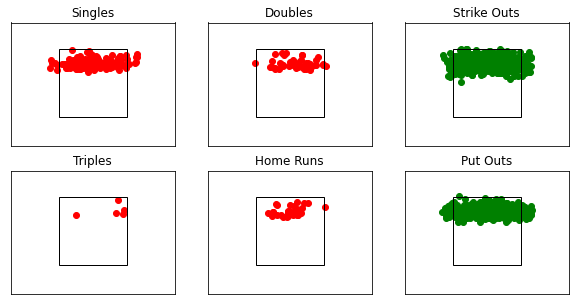

In [165]:
#Graphical Findings (multiple breakdowns)
x_coor, z_coor = -0.83, 1.17
plt.figure()
figure, axis = plt.subplots(2,3,figsize=(10, 5))

axis[0,0].add_patch(Rectangle((x_coor, z_coor), 1.66, 2.75, alpha=1, fill=None))
axis[0,1].add_patch(Rectangle((x_coor, z_coor), 1.66, 2.75, alpha=1, fill=None))
axis[1,0].add_patch(Rectangle((x_coor, z_coor), 1.66, 2.75, alpha=1, fill=None))
axis[1,1].add_patch(Rectangle((x_coor, z_coor), 1.66, 2.75, alpha=1, fill=None))
axis[0,2].add_patch(Rectangle((x_coor, z_coor), 1.66, 2.75, alpha=1, fill=None))
axis[1,2].add_patch(Rectangle((x_coor, z_coor), 1.66, 2.75, alpha=1, fill=None))

xmin, xmax = -2, 2
ymin, ymax = 0, 5

axis[0,0].set(xlim=(xmin, xmax), ylim=(ymin, ymax))
axis[0,1].set(xlim=(xmin, xmax), ylim=(ymin, ymax))
axis[1,0].set(xlim=(xmin, xmax), ylim=(ymin, ymax))
axis[1,1].set(xlim=(xmin, xmax), ylim=(ymin, ymax))
axis[0,2].set(xlim=(xmin, xmax), ylim=(ymin, ymax))
axis[1,2].set(xlim=(xmin, xmax), ylim=(ymin, ymax))

axis[0,0].scatter(df_single_x, df_single_z, color='r')
axis[0,1].scatter(df_double_x, df_double_z, color='r')
axis[1,0].scatter(df_triple_x, df_triple_z, color='r')
axis[1,1].scatter(df_homer_x, df_homer_z, color='r')
axis[0,2].scatter(df_ks_x, df_ks_z, color='g')
axis[1,2].scatter(df_outs_x, df_outs_z, color='g')

axis[0,0].set_title("Singles")
axis[0,1].set_title("Doubles")
axis[1,0].set_title("Triples")
axis[1,1].set_title("Home Runs")
axis[0,2].set_title("Strike Outs")
axis[1,2].set_title("Put Outs")

axis[0,0].axes.xaxis.set_visible(False)
axis[0,0].axes.yaxis.set_visible(False)

axis[0,1].axes.xaxis.set_visible(False)
axis[0,1].axes.yaxis.set_visible(False)

axis[1,0].axes.xaxis.set_visible(False)
axis[1,0].axes.yaxis.set_visible(False)

axis[1,1].axes.xaxis.set_visible(False)
axis[1,1].axes.yaxis.set_visible(False)

axis[0,2].axes.xaxis.set_visible(False)
axis[0,2].axes.yaxis.set_visible(False)

axis[1,2].axes.xaxis.set_visible(False)
axis[1,2].axes.yaxis.set_visible(False)

plt.show()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

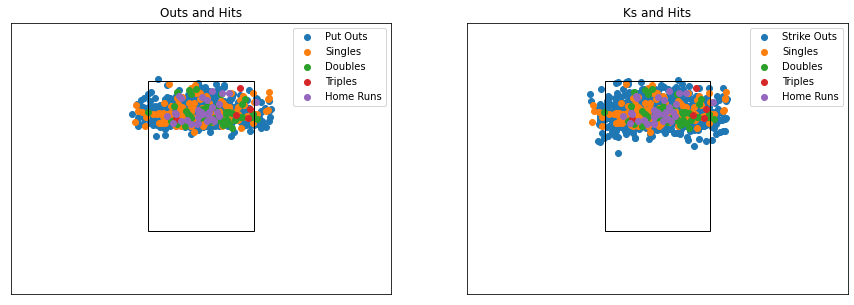

<Figure size 432x288 with 0 Axes>

In [166]:
#Graphical Findings (Outs vs. Hits)
x_coor, z_coor = -0.83, 1.17
#axis = plt.gca()
plt.figure()
figure, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 5))
ax1.add_patch(Rectangle((x_coor, z_coor), 1.66, 2.75, alpha=1, fill=None))
ax2.add_patch(Rectangle((x_coor, z_coor), 1.66, 2.75, alpha=1, fill=None))


xmin, xmax = -3, 3
ymin, ymax = 0, 5

ax1.set(xlim=(xmin, xmax), ylim=(ymin, ymax))
ax2.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

ax1.scatter(df_outs_x, df_outs_z, label="Put Outs")
ax1.scatter(df_single_x, df_single_z, label="Singles")
ax1.scatter(df_double_x, df_double_z, label="Doubles")
ax1.scatter(df_triple_x, df_triple_z, label="Triples")
ax1.scatter(df_homer_x, df_homer_z, label="Home Runs")

ax2.scatter(df_ks_x, df_ks_z, label="Strike Outs")
ax2.scatter(df_single_x, df_single_z, label="Singles")
ax2.scatter(df_double_x, df_double_z, label="Doubles")
ax2.scatter(df_triple_x, df_triple_z, label="Triples")
ax2.scatter(df_homer_x, df_homer_z, label="Home Runs")

ax1.set_title("Outs and Hits")
ax1.legend()

ax2.set_title("Ks and Hits")
ax2.legend()

ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)

ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)

plt.figure()

# Basic Statistical Findings

In [167]:
#Basic Statistical Findings
num_strikes = len(df_strikes.index)
num_ks = len(df_ks.index)
num_outs = len(df_outs.index)
num_hits = len(df_hits.index)

print("Number of Strikes: ", num_strikes)
print("Number of Strike Outs: ", num_ks)
print("Number of Put Outs: ", num_outs)
print("Number of Hits: ", num_hits)

#get a "rough" measure of batting average by taking hits divided by the 3 basic outcomes (hit, put out, strikout)
rough_BA = num_hits / (num_hits + num_outs + num_ks)
print("'Rough' Measure Batting Average on Slider B: ", round(rough_BA, 3))

Number of Strikes:  5553
Number of Strike Outs:  776
Number of Put Outs:  589
Number of Hits:  220
'Rough' Measure Batting Average on Slider B:  0.139


# Comparisons with Some Other Pitch+Location Combinations

Compare values with BA vs. All Pitch for Statcast Attack Zones 11-13 (correspond to the average of the 4 zones above and below the top of the strike zone in the below image):

Average BA All Pitches (Reasonably hittable; in-zone/just outside) = ~0.206

Average BA 4S Fastball (in Attack Zones 11-13) = ~0.170

Average BA All Pitches (in Attack Zones 11-13) = ~0.175
#### Average BA "Slider B" = ~0.139

I realize that batting average is not the best measure of success, but it is a basic metric to start the research on this deep dive.

##### Graphical visualization pulled from Statcast Savant.

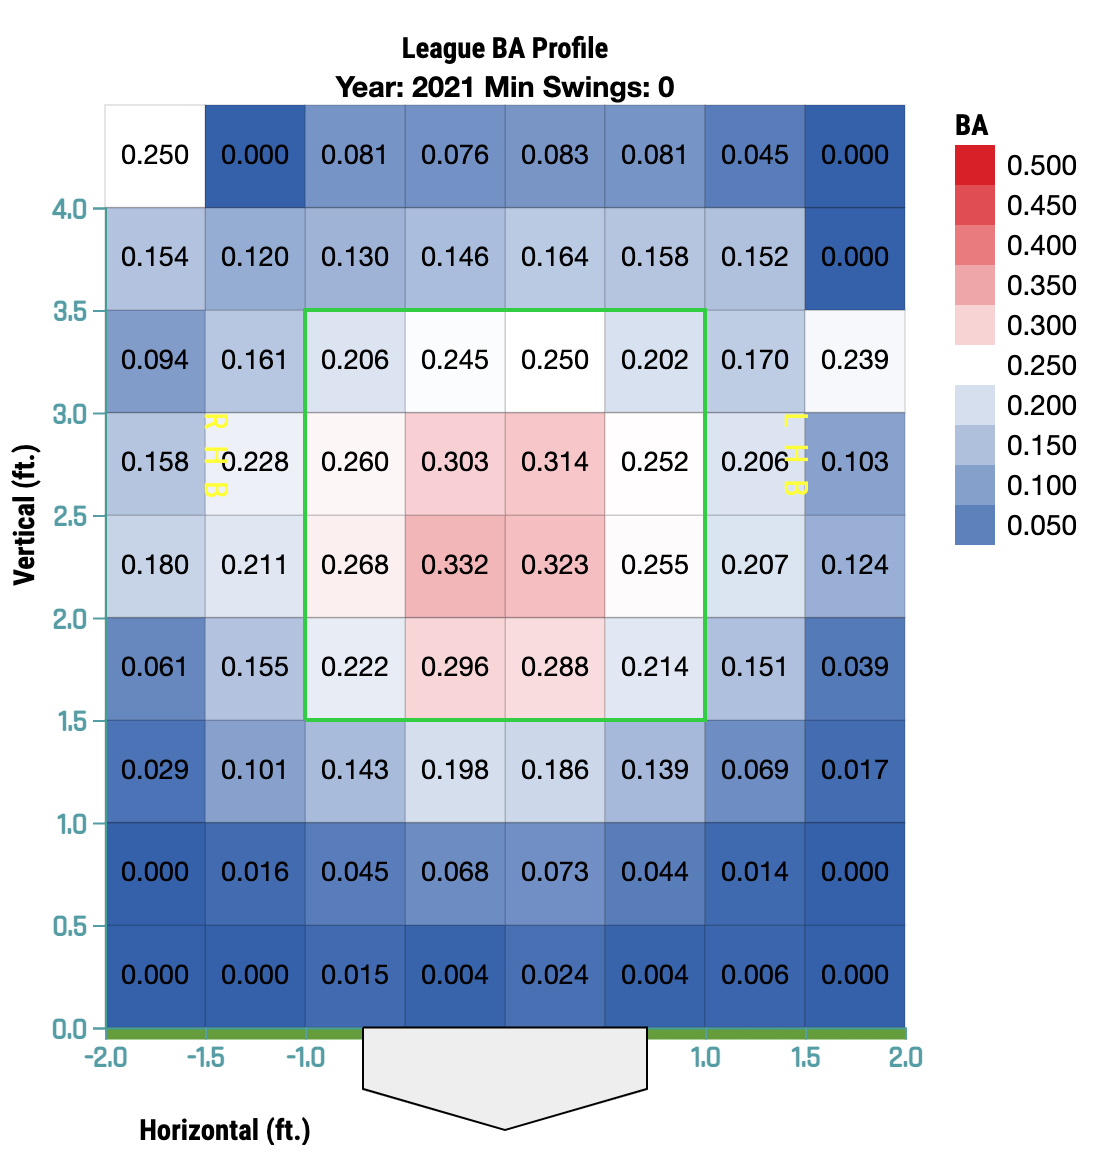